In [ ]:
# Cài đặt Java và Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark pyspark


In [ ]:
import os
import findspark

# Thiết lập đường dẫn cho Spark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc

# Khởi tạo Spark Session
spark = SparkSession.builder \
    .appName("Facebook Outage Analysis") \
    .getOrCreate()


In [ ]:
from google.colab import files

uploaded = files.upload()  # Mở hộp thoại để upload file


Saving Facebook_outage_Tweet_data_4th_October.csv to Facebook_outage_Tweet_data_4th_October.csv


In [ ]:
# Cài đặt Java và Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark pyspark


In [ ]:
import os
import findspark

# Thiết lập đường dẫn cho Spark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc

# Khởi tạo Spark Session
spark = SparkSession.builder \
    .appName("Facebook Outage Analysis") \
    .getOrCreate()



In [ ]:
# Đọc file CSV vào Spark DataFrame
df = spark.read.csv("Facebook_outage_Tweet_data_4th_October.csv", header=True, inferSchema=True)

# Hiển thị 5 dòng đầu tiên
df.show(5)


+-------------------+-------------------+--------------------+----------+--------+--------+-------------------+---------------+--------------+-----+--------------------+--------+--------+----+--------------------+-------------+--------------+-----------+------------+--------+--------------------+-------+---------+-----+--------------------+----+----+------+----------+-------+----------+--------------------+------------+---------+---------+----------+
|                 id|    conversation_id|          created_at|      date|    time|timezone|            user_id|       username|          name|place|               tweet|language|mentions|urls|              photos|replies_count|retweets_count|likes_count|    hashtags|cashtags|                link|retweet|quote_url|video|           thumbnail|near| geo|source|user_rt_id|user_rt|retweet_id|            reply_to|retweet_date|translate|trans_src|trans_dest|
+-------------------+-------------------+--------------------+----------+--------+--------

In [ ]:
df.groupBy("date").agg(count("*").alias("tweet_count")) \
    .orderBy(desc("tweet_count")) \
    .show()


+----------+-----------+
|      date|tweet_count|
+----------+-----------+
|2021-10-04|     304135|
|        []|          1|
+----------+-----------+



In [ ]:
from pyspark.sql.functions import explode, split

# Assuming the tweet content is in the 'tweet' column
hashtags = df.select(explode(split(col("tweet"), " ")).alias("word")) \
             .filter(col("word").startswith("#")) \
             .groupBy("word") \
             .agg(count("*").alias("count")) \
             .orderBy(desc("count"))

hashtags.show(10)

+-----------------+-----+
|             word|count|
+-----------------+-----+
|        #Facebook|16967|
|    #facebookdown|15814|
|        #WhatsApp|11090|
|       #instagram| 6184|
|   #instagramdown| 5182|
|        #facebook| 4336|
|       #Instagram| 4218|
|    #whatsappdown| 3351|
|#InternetShutDown| 1890|
|       #instadown| 1874|
+-----------------+-----+
only showing top 10 rows



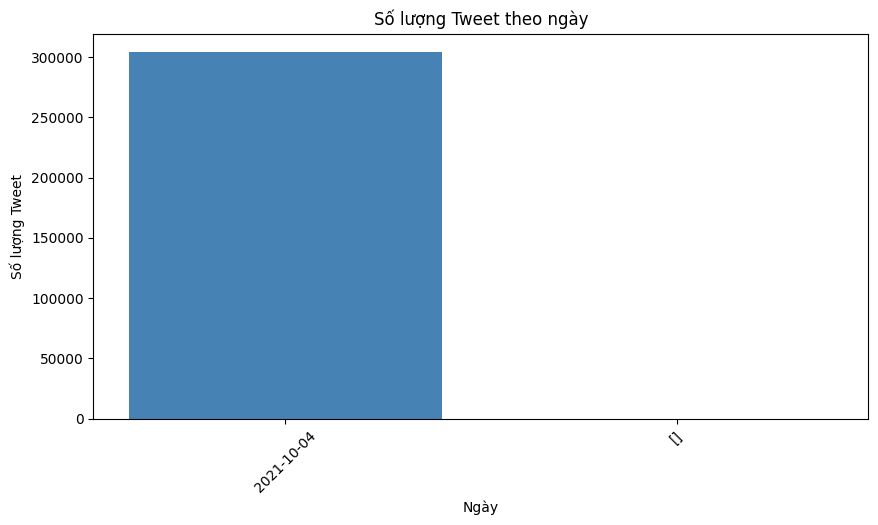

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển dữ liệu từ Spark DataFrame về Pandas để vẽ
tweet_counts = df.groupBy("date").agg(count("*").alias("tweet_count")) \
                 .orderBy("date").toPandas()

# Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.bar(tweet_counts["date"], tweet_counts["tweet_count"], color="steelblue")
plt.xlabel("Ngày")
plt.ylabel("Số lượng Tweet")
plt.title("Số lượng Tweet theo ngày")
plt.xticks(rotation=45)
plt.show()


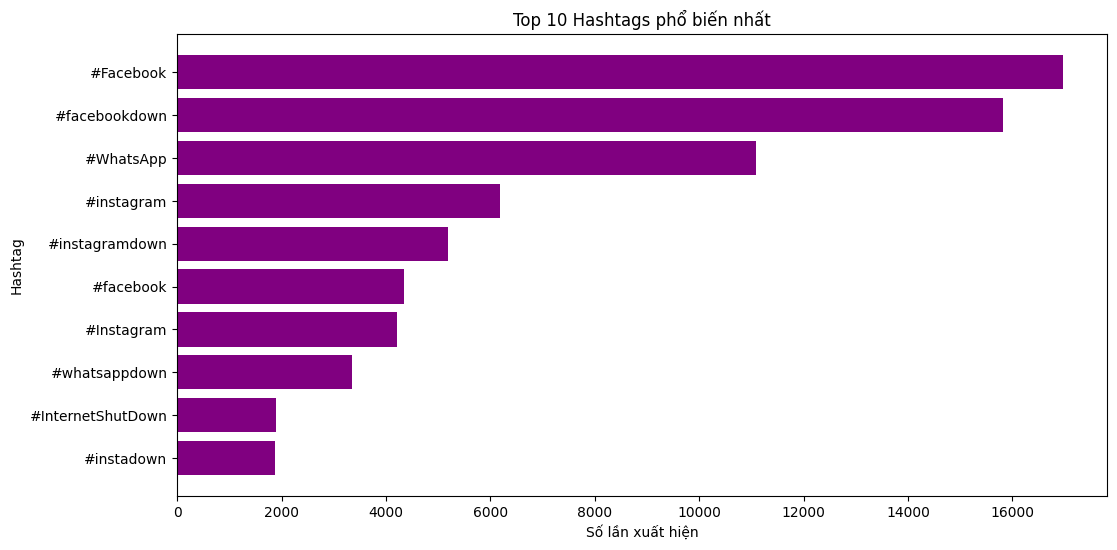

In [ ]:
# Chuyển dữ liệu từ Spark về Pandas
hashtag_df = hashtags.limit(10).toPandas()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.barh(hashtag_df["word"], hashtag_df["count"], color="purple")
plt.xlabel("Số lần xuất hiện")
plt.ylabel("Hashtag")
plt.title("Top 10 Hashtags phổ biến nhất")
plt.gca().invert_yaxis()  # Đảo ngược trục Y để hashtag phổ biến nhất lên đầu
plt.show()


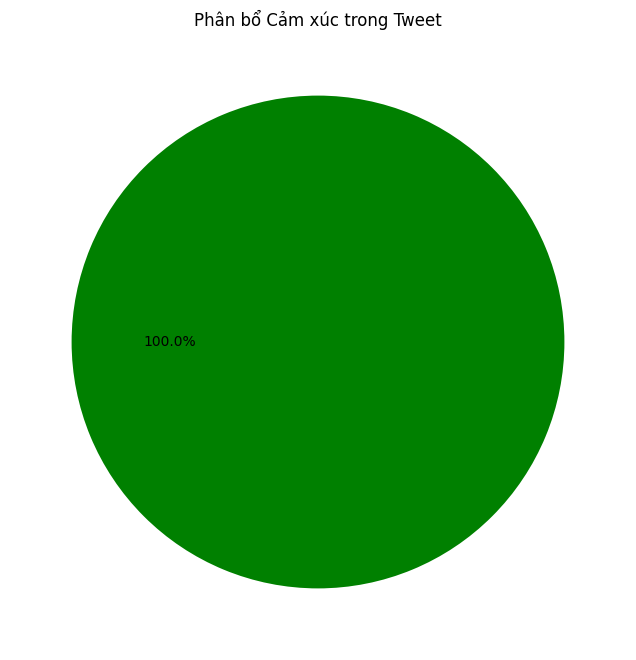

In [ ]:
# Đếm số lượng tweet theo cảm xúc
sentiment_counts = df.groupBy("sentiment").agg(count("*").alias("count")).toPandas()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts["count"], labels=sentiment_counts["sentiment"], autopct="%1.1f%%", colors=["green", "red", "gray"])
plt.title("Phân bổ Cảm xúc trong Tweet")
plt.show()


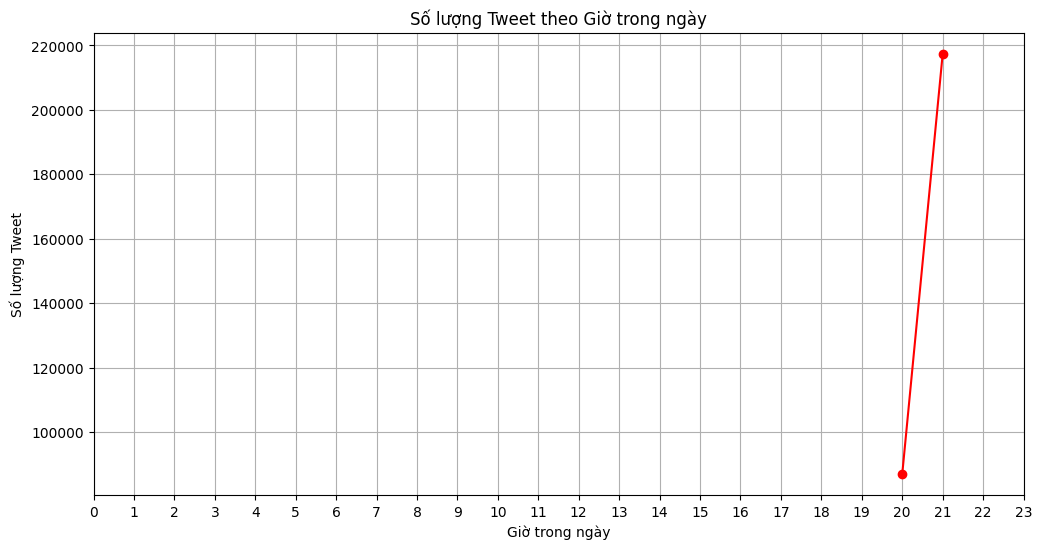

In [ ]:
hourly_tweets = df.groupBy("hour").agg(count("*").alias("tweet_count")) \
                  .orderBy("hour").toPandas()

plt.figure(figsize=(12, 6))
plt.plot(hourly_tweets["hour"], hourly_tweets["tweet_count"], marker='o', linestyle='-', color="red")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Số lượng Tweet")
plt.title("Số lượng Tweet theo Giờ trong ngày")
plt.xticks(range(0, 24))
plt.grid()
plt.show()
